# Самостоятельный проект: "Принятие решений в бизнесе"

# Содержание:
1. [Описание проекта;](#step1)
2. [Шаг 1: Анализ данных и предобработка;](#step2)
3. [Шаг 2: Приоритизация гипотез;](#step3)
4. [Шаг 3: Анализ А/В-теста;](#step4)
5. [Вывод](#step5)

# Описание проекта <a id="step1"></a>   
</div>

## Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## План действий:

1. Импортируем библиотеки, загрузим файлы данных, изучим их;
2. Проверим названия столбцов, наличие пропусков;
3. Сделаем приоритизацию гипотез;
4. Сделаем анализ результатов проведенного А/В-теста. Сделаем некоторые выводы и предположения

# Шаг 1: Анализ данных и предобработка <a id="step2"></a>   
</div>

In [1]:
# Импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats as st
import math as mth
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# Сохраним файл в переменнe.
# Файл с 9 гипотезами:
data = pd.read_csv('D:/Project/7/hypothesis.csv', sep=',')

Рассмотрим каждую таблицу по-отдельности: общую информацию, названия колонок

In [3]:
# Рассмотрим таблицу с гипотезами. Так как гипотез всего 9, метод `head()` не будем использовать
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# Приведем название колонок к нижнему регистру
data.columns = data.columns.str.lower()

In [5]:
# Общая информация по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Перед нами 9 гипотез по увеличению выручки интернет-маганзина с параметрами:
* `hypothesis` - краткое описание гипотезы;
* `reach` - охват пользователей по 10-балльной шкале;
* `impact` - влияние на пользователей по 10-балльной шкале;
* `confidence` - уверенность в гипотезе по 10-балльной шкале;
* `efforts` - затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

# Шаг 2: Приоритизация гипотез <a id="step3"></a>   
</div>

Сделам приоритизацию гипотез. ICE - один из самых популярных способов приоритизации задач. Рассчитывается по формуле: 
(impact * confidence)/efforts. Т.е. произведение влияния на пользователей и уверенности в гипотезе, деленное на затраты ресурсов на проверку гипотезы

In [7]:
# Создадим столбец `ICE` о приоритизации гипотез
data['ice'] = (data['impact']*data['confidence'])/data['efforts']

In [8]:
# Отсортируем по убыванию приоритета
data_sort_ice = data[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)
data_sort_ice

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Видим, что наиболее перспективные гипотезы с индексами 8, 0 и 7

RICE (охват) - модификация ICE. Вычисляется по формуле: (reach*impact*confidence)/efforts. Т.е. прозведение охвата пользователей, влияния пользователей, уверенность в гипотезе деленные на затраты ресурсов на проверку гипотезы

In [9]:
# Создадим столбец `RICE` о приоритизации гипотез
data['rice'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']

In [10]:
# Отсортируем по убыванию приоритета
data_sort_rice = data[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)
data_sort_rice

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,56.00
0,"Добавить два новых канала привлечения трафика,...",40.00
6,Показать на главной странице баннеры с актуаль...,40.00
8,"Запустить акцию, дающую скидку на товар в день...",16.20
3,"Изменить структура категорий, что увеличит кон...",9.00
1,"Запустить собственную службу доставки, что сок...",4.00
5,"Добавить страницу отзывов клиентов о магазине,...",4.00
4,"Изменить цвет фона главной страницы, чтобы уве...",3.00


Наиболее перспективные гипотезы с индексами 7, 2, 0 и 6

In [11]:
# Сделаем общую таблицу с гипотезами и приоритизациями ICE и RICE
data_sort = data[['hypothesis', 'ice', 'rice']]
data_sort.sort_values(by='ice', ascending=False)

,hypothesis,ice,rice
8,"Запустить акцию, дающую скидку на товар в день...",16.20,16.20
0,"Добавить два новых канала привлечения трафика,...",13.33,40.00
7,Добавить форму подписки на все основные страни...,11.20,112.00
6,Показать на главной странице баннеры с актуаль...,8.00,40.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00,56.00
1,"Запустить собственную службу доставки, что сок...",2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33,4.00
3,"Изменить структура категорий, что увеличит кон...",1.12,9.00
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00,3.00


In [12]:
# Рассмотри полное имя гипотез
data['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Видим, что при приотизации гипотез ICE и RICE гипотезы с индексами 0 и 7 являются наиболее перспективными. 
Гипотеза с индексом 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" является перспективной, т.к. ее основные параметры (охват пользователей, влияние, уверенность) довольно высокие. Что в принципе логично: пользователи, заинтересованные в товаре, будут оставлять электронную почту, на которую в дальнейшем им можно отправлять рекламную рассылку, что может их повторно привлечь в наш интернет-магазин.

У гипотезы с индексом 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" также является перспективным из-за высоких параметров (влияния на пользователей и уверенность). Пользователи увеличатся, соответственно, может увеличиться и доход.

В то же время, гипотеза 8 "Запустить акцию, дающую скидку на товар в день рождения", лидирующая в ICE, в RICE находится в середине, так как имеет малый охват пользователей (reach). Известно, что День Рождения - только раз в году, поэтому данная акция затронет малый процент пользователей

# Шаг 3: Анализ А/В-теста <a id="step4"></a>   
</div>

Сохраним полученные результаты А/В-теста в переменные:

In [13]:
# Данные заказов
orders = pd.read_csv('D:/Project/7/orders.csv', sep=',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Таблица имеет 5 колонок и 1197 строк. Пропущенных значений нет, названия колонок в нижнем регистре

In [15]:
# Преобразуем столбец `date` методом map()
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Таблица `orders` готова

In [16]:
# Данные визитов
visitors = pd.read_csv('D:/Project/7/visitors.csv', sep=',')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
# Преобразуем столбец `date` методом map()
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Таблица имеет 3 колонки и 62 строки. Пропущенных значений нет, названия колонок в нижнем регистре

Таблица `visitors` готова

Проверим таблицы на наличие дубликатов:

In [19]:
# Воспользуемся методом duplicated()
visitors.duplicated().sum()

0

In [20]:
# Воспользуемся методом duplicated()
orders.duplicated().sum()

0

### Проанализируем А/В-тест:

In [21]:
# Посчитаем группы A/B-теста:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Получилось, что в нашем тесте только 2 группы: А и В.

In [22]:
# Посмотрим дату начала теста:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [23]:
# Посмотрим дату окончания теста:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Тест проводился с 01 августа 2019 года по 31 августа 2019 года

In [24]:
# Посмотрим, сколько всего уникальных пользователей:
orders['visitorId'].nunique()

1031

In [25]:
# Сгруппируем таблицу с заказами по группам и посчитаем количество уникальных значений
total_visitor = orders.groupby('visitorId')['group'].nunique()
total_visitor

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [26]:
# Склеим таблицу
visitor_a_b = orders.merge(total_visitor, on=['visitorId'])
visitor_a_b

,transactionId,visitorId,date,revenue,group_x,group_y
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
2,2961555356,4069496402,2019-08-15,400,A,2
3,1473132782,4069496402,2019-08-12,640,B,2
4,3797467345,1196621759,2019-08-15,9759,B,1
...,...,...,...,...,...,...
1192,3592955527,608641596,2019-08-14,16490,B,1
1193,2662137336,3733762160,2019-08-14,6490,B,1
1194,2203539145,370388673,2019-08-14,3190,A,1
1195,1807773912,573423106,2019-08-14,10550,A,1


In [27]:
# Посчитаем идентификаторы пользователя, встречающиеся более 1 раза
visitor_a_b[visitor_a_b['group_y']>1]['visitorId'].count()

181

In [28]:
# Посчитаем количество дубликатов
visitor_a_b['visitorId'].duplicated().sum()

166

In [29]:
# Посчитаем количество пользователей в каждой группе
visitor_a_b['group_x'].value_counts()

B    640
A    557
Name: group_x, dtype: int64

In [30]:
test = total_visitor.reset_index()
len(test[test['group'] > 1])

58

In [31]:
# покупатели группы А + покупатели группы В
orders.groupby('group').agg({'visitorId': 'nunique'}).sum()[0]

1089

In [32]:
# всего покупателей
orders['visitorId'].nunique()

1031

In [33]:
# Создадим датафрейм `datesGroups` с уникальными парами значений 'date' и 'group', таблицы orders. 
#  Избавимся от дубликатов методом drop_duplicates()
datesGroups = orders[['date', 'group']].drop_duplicates()

In [34]:
# Объявим переменную `ordersAggregated`, содержащую:
# дату;
# группу A/B-теста;
# число уникальных заказов в группе теста по указанную дату включительно;
# число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
# суммарную выручку заказов в группе теста по указанную дату включительно
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(
    by=['date','group'])

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(
    by=['date','group'])

In [35]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [36]:
# Объявим переменную `visitorsAggregated`, содержащую:
# дату;
# группу A/B-теста;
# количество уникальных посетителей в группе теста по указанную дату включительно
# `ordersAggregated` и `visitorsAggregated` отсортируем по столбцам 'date', 'group'
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(
    by=['date','group'])

In [37]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [38]:
# Опредим переменную `cumulativeData`, объединив `ordersAggregated` и `visitorsAggregated` по колонкам 'date', 'group' 
# методом merge()
# Присвоим столбцам `cumulativeData` названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [39]:
# Выведим первые 5 строк переменной `cumulativeData`
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Названия колонок:
* `date` - дата;
* `group` - группа А/В-теста;
* `orders` - заказы;
* `buyers` - покупатели;
* `revenue` - выручка заказа;
* `visitors` - количество пользователей в указанную дату в указанной группе А/В-теста

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

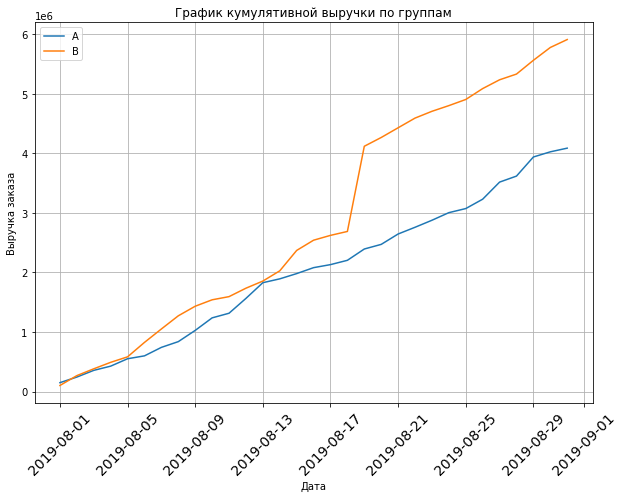

In [40]:
# Объявим переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых сохраним данные о датах, выручке и числе заказов 
# в группах A и B.
# Построим графики кумулятивной выручки по дням по группам

fig = plt.figure(figsize=[10,7])

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка заказа')
plt.xticks(fontsize=14, rotation=45)
plt.legend()

Согласно графика, группа В сразу же лидировала по выручке. В середине видим резкий вспеск выручки - это выброс.

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

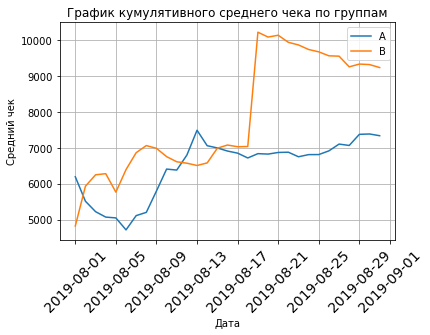

In [41]:
# Средний чек - это отношение выручки к общим заказам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(fontsize=14, rotation=45)
plt.legend() 

Кумулятивный средний чек в группе А сначала упал, но со временем вырос и держался примерно одинаково. Средний чек группы В рос неравномерно, а в середине произошел всплеск. Значит, точно был выброс - значительная выручка в группе В

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

Построим график с целью наглядно увидеть разницу между группами:

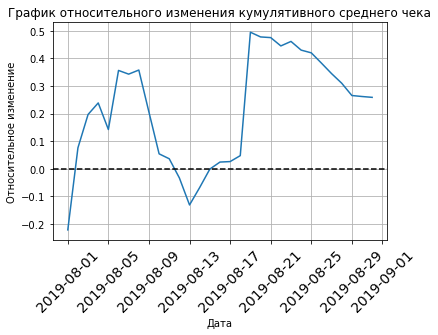

In [42]:
# Объединим таблицы `cumulativeRevenueA` и `cumulativeRevenueB` методом merge() и сохраним 
# в переменной `mergedCumulativeRevenue`;
# Построим график относительно различия кумулятивного среднего чека группы B к группе A;
# Добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(fontsize=14, rotation=45);

Результаты менялись вначале и в середине теста. Видим, что были крупные заказы

#### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

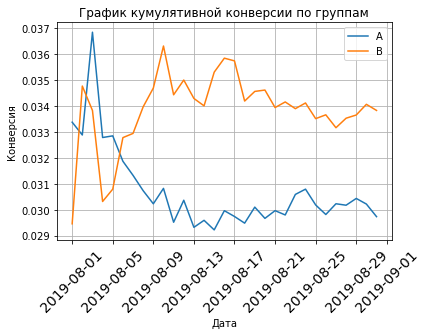

In [43]:
# Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе 
# в указанный день.
# Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно.
# Построим графики кумулятивной конверсии по дням по группам.
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(fontsize=14, rotation=45)
plt.legend()

Кумулятивная конверсия группы А в начале резко возрасла и резко упала, после чего держалась примерно на одном уровне. Конверсия группы В два раза резко взлетала и на конец периода значительно больше группы А

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

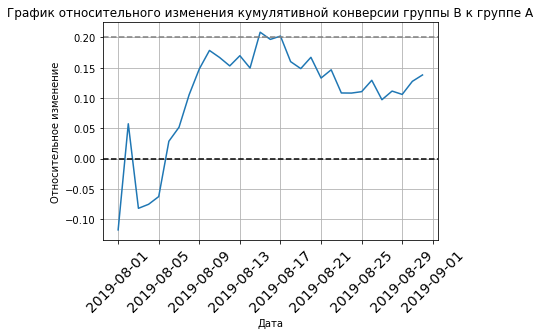

In [44]:
# Объединим таблицы cumulativeDataA и cumulativeDataB методом merge();
# Построим график относительного различия кумулятивной конверсии группы B к группе A;
# Добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 
# и ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2.
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', 
                                                                           how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, )
#plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.grid()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(fontsize=14, rotation=45)

Судя по этому графику, кумулятивная конверсия группы В сразу же начала расти и в середине теста достигала прироста в 20% относительно группы А. Но стоить отметить, что этому способствовал резкий прирост, а дальнейшем кумулятивная конверсия держалась примерно в промежутке от 10% до 15%

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Из представленных выше графиков мы увидели, что в наших данных есть аномально большые заказы, которые могут исказить наши графики. Поэтому такие заказы следует удалить из нашего теста. Однако, на графиках выше мы не видим, есть ли такие заказы. Посмотрим, есть ли такие большие заказы в наших данных

In [45]:
# Для начала найдем число заказов по пользователям: сгруппируем данные по таблице "Заказы" 
# по уникальному идентификатору заказа
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId':'nunique'})
    .sort_values(by='transactionId', ascending=False)
)
ordersByUsers.head()

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Видим, что есть пользователи, которые заказывали более более 5 раз! 

Построим точечный график:

Text(0, 0.5, 'Количество заказов')

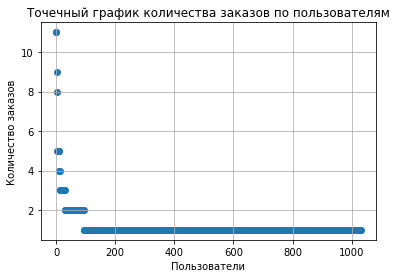

In [46]:
# Для построения точечного графика воспользуемся методом `scatter()`
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

По представленному графику видим, что совсем мало пользователей, сделавших заказ более двух раз. В основном пользователи делают 1 заказ, совсем немного - 2 заказа

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [47]:
# Для нахождения перцентилей выберем метод библиотеки numpy `np.percentile()`
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

Т.е. не более 5% пользователей осуществляли покупки больше двух раз и не более 1% пользователей совершали покупку более 4 раз

Будем считать, что пользователи, у которых более четырех заказов - это аномальные заказы. Их всего 1% (статистическая погрешность)

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

Text(0, 0.5, 'Стоимость заказов')

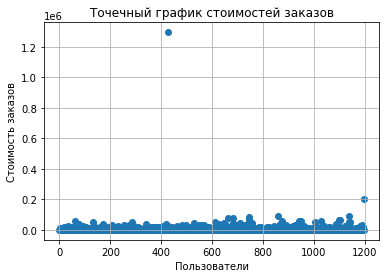

In [48]:
# Так же воспользуемся методом `scatter()`
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

Как видим, в основном все заказы в пределах до 100 000 рублей. Но есть и один заказ стоимостью более 1,2 млн! Скорее всего, из-за него на графиках выше в группе В был такой резкий рывок наверх. Т.е. это явно аномалия

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [49]:
# Для нахождения перцентилей воспользуемся уже опробованным нами методом `np.percentile()`
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более, чем 5% заказов дороже 28 000 рублей. И не более, чем у 1% стоимость заказа дороже 58 000 рублей. Так же будем считать 1% за аномальные заказы

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

Сформулируем гипотезы:
* Нулевая гипотеза - различий в конверсии между группами нет;
* Альтернативная гипотеза - различия в конверсии между группами есть

Для подсчета статистической значимости необходимо подготовить данные:

In [50]:
# Сохраним в переменной данные группы А и переименуем колонки
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [51]:
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [52]:
# Создадим куммулятивные данные в таблице (1+2 день, + 3 день и т.д)
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [53]:
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Проделаем то же самое для группы В:

In [54]:
# Сохраним в переменной данные группы В и переименуем колонки
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [55]:
# Создадим куммулятивные данные в таблице (1+2 день, + 3 день и т.д)
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Создадим переменную, где для пользователей группы А, совершивших хотя бы 1 заказ будет указано число заказов:

In [56]:
# Сгруппируем колонки
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [57]:
# Кумулятивные данные группы А
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1).sort_values(by=['date'])
ordersACummulative.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [58]:
# Переименуем колонки
ordersACummulative.columns = ['date', 'ordersCummulativeA','revenueCummulativeA']

Создадим переменную, где для пользователей группы В, совершивших хотя бы 1 заказ будет указано число заказов:

In [59]:
# Сгруппируем колонки
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [60]:
# Кумулятивные данные группы B
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [61]:
# Переименуем колонки
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

"Смерджим" все в одну таблицу:

In [62]:
data_new = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data_new.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные для пользователей, совершивших хотя бы 1 заказ:

In [63]:
# Группа А
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg(
    {'transactionId': pd.Series.nunique}))
ordersByUsersA.sort_values(by='transactionId', ascending=False).head()

,visitorId,transactionId
499,4256040402,7
227,2038680547,5
278,2458001652,5
269,2378935119,4
18,199603092,4


In [64]:
# Группа В
ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.sort_values(by='transactionId', ascending=False).head()

,visitorId,transactionId
340,2458001652,6
326,2378935119,5
501,3717692402,4
514,3803269165,4
580,4256040402,4


In [65]:
# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
# А пользователям без заказов — нули.
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(
    0, index=np.arange(data_new['visitorsPerDateA'].sum() - len(
        ordersByUsersA['transactionId'])), name='transactionId')],axis=0)

In [66]:
sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(
    0, index=np.arange(data_new['visitorsPerDateB'].sum() - len(
        ordersByUsersB['transactionId'])), name='transactionId')],axis=0)

Посчитаем статистическую значимость различия конверсии с применением теста Манна-Уитни и выведем p-value:

In [67]:
display("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))


'0.017'

Вычислим и выведем относительное различие в конверсии между группами:

In [68]:
display("{0:.3f}".format((data_new['ordersPerDateB'].sum()/data_new['visitorsPerDateB'].sum())/
                       (data_new['ordersPerDateA'].sum()/data_new['visitorsPerDateA'].sum())-1))

'0.138'

Вывод: p-value < 0.05. Следовательно, отвергаем нулевую гипотезу (значит, в конверсии между группами есть статистически значимые различия). Относительный прирост по "сырым" данным конверсии группы В к группе А составляет 13,8%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

In [69]:
display('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
display('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.729'

'0.259'

Вывод: p-value > 0.05. Следовательно, не отвергаем нулевую гипотезу (значит, между группами нет статистически значимых различий в среднем чеке). Относительное различие по "сырым" данным группы В к группе А составляет 25,9%

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

Приступим к "очистке" данных. Удалим пользователей: сначала определим аномальные заказы, потом пользователей, совершивших их:

In [70]:
# Удалим пользователей, совершивших покупки более двух раз
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 2]['visitorId'],
    ],
    axis=0,
)


In [71]:
# Удалим пользователей, совершивших покупки на сумму более 58 000 рублей
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']

In [72]:
# "Сцепим" все в одну переменную
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


Создадим переменную для группы А, в которых сохраним очищенные данные о заказах:

In [73]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

Создадим переменную для группы B, в которых сохраним очищенные данные о заказах:

In [74]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data_new['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

In [75]:
# Выведем p-value для сравнения конверсии между очищенными группами и относительный прирост конверсии очищенной группы B
display('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

'0.010'

'0.174'

* p-value < 0.05. Следовательно, отвергаем нулевую гипотезу (значит, по по "очищенным" данным конверсии между группами есть статистически значимые различия).
* Относительный прирост по "очищенным" данным конверсии группы В к группе А составляет 17,4%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения

In [76]:
display(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

'0.798'

'-0.020'

Вывод: p-value > 0.05. Следовательно, не отвергаем нулевую гипотезу (значит, между группами нет статистически значимых различий в среднем чеке). Относительное различие по "очищенным" данным группы В к группе А составляет 2%

# Вывод <a id="step5"></a>   
</div>

Для принятия решение по результатам теста сделаем выводы:
* Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по "очищенным" данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным после фильтрации аномалий;
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения;
* График различия среднего между группами хоть и колеблется, но так же видно, что группа В лучше, чем группа А

##### Принимаем следующее решение:
Останавливаем тест, признаем его успешным и фиксируем победу группы В. Т.е. пользователи будут лучше заказывать в нашем интернет-магазине, если перед ними окажется измененная версия страницы сайта